In [87]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pywt
from tqdm import tqdm
from matplotlib.image import imread
import os

In [120]:
# Define the image path
image_path = "/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Dataset/train/002_img.png"

# Load the image
image = Image.open(image_path).convert("L")
image_array = np.array(image, dtype=np.float32) / 255.0
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

(np.float64(-0.5), np.float64(258.5), np.float64(194.5), np.float64(-0.5))

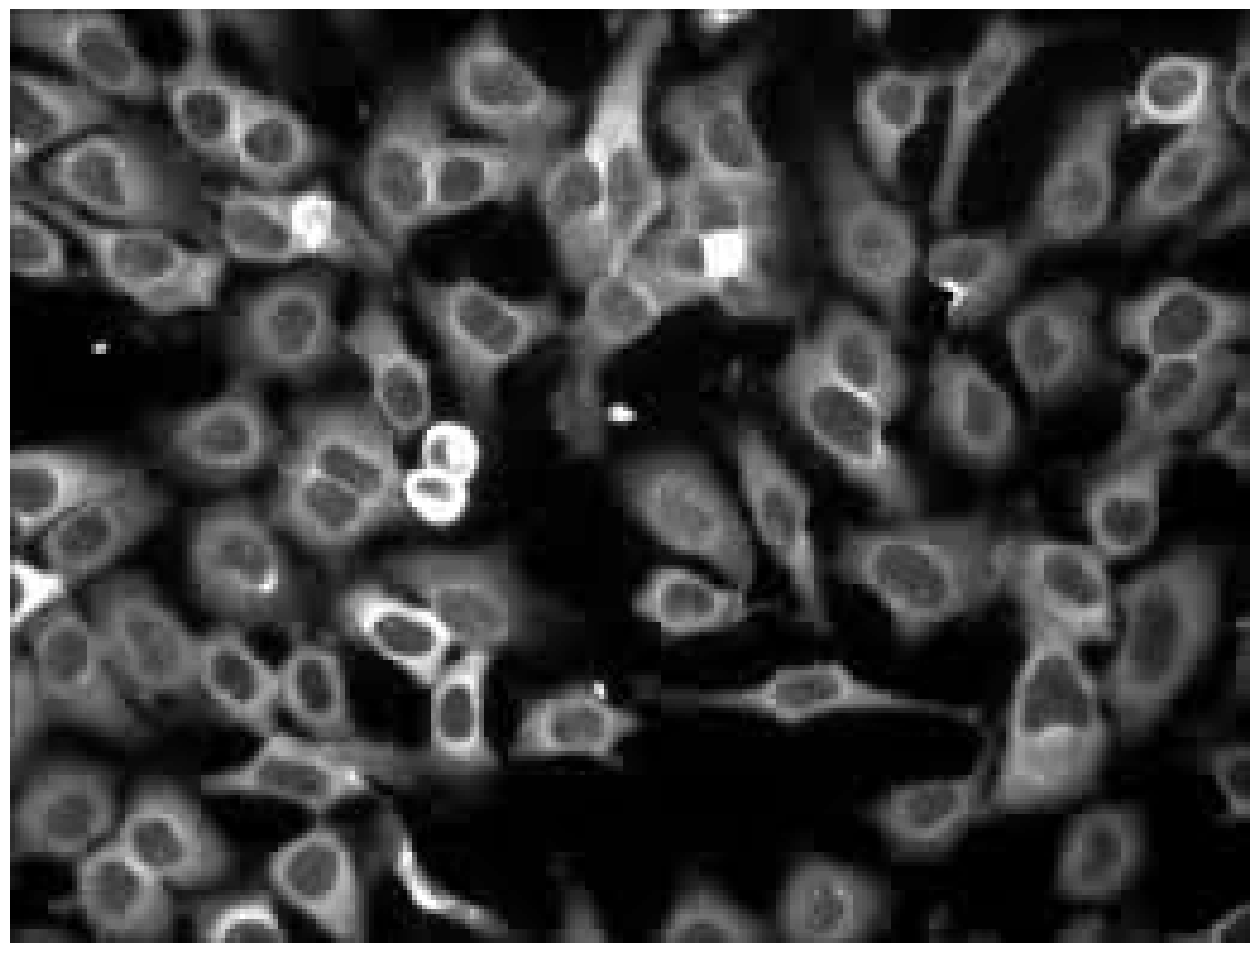

In [121]:
plt.imshow(image_array, cmap="gray")
plt.axis('off')

In [122]:
import warnings
warnings.filterwarnings("ignore")

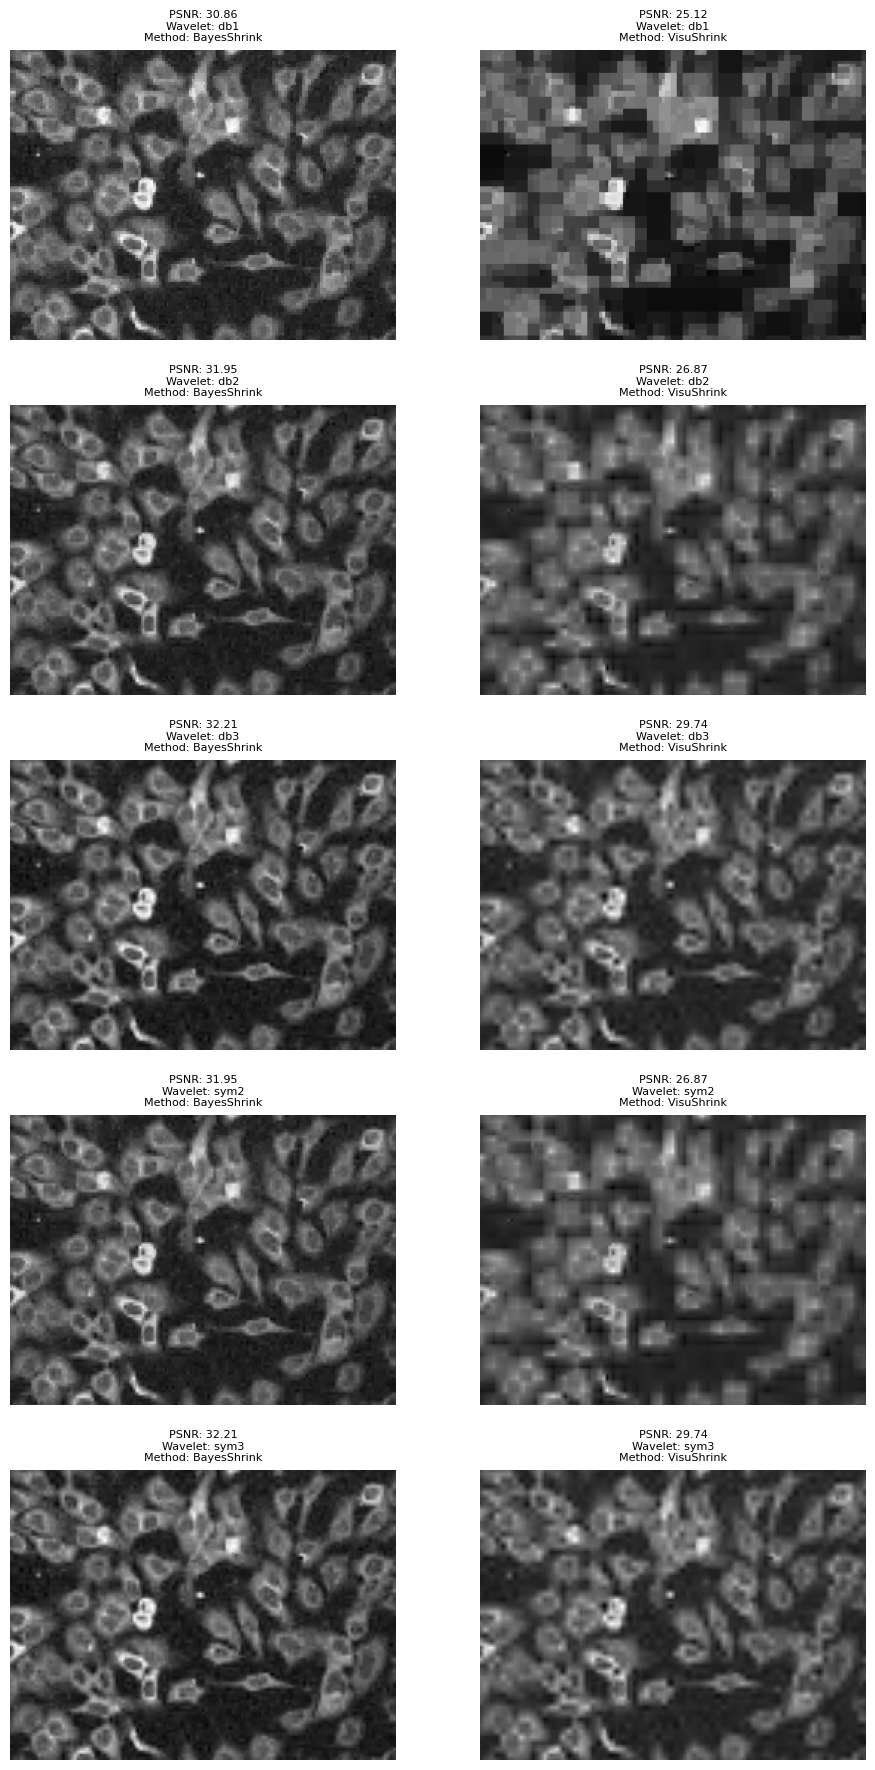

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Function to calculate PSNR
def calculate_psnr(original, denoised):
    mse = mean_squared_error(original, denoised)
    return 20 * np.log10(1 / np.sqrt(mse)) if mse > 0 else float('inf')

# Wavelet denoising function using skimage's denoise_wavelet
def wavelet_denoise(image, wavelet, method):
    denoised_image = restoration.denoise_wavelet(image, wavelet=wavelet,
                                                 mode="soft", method=method, 
                                                 wavelet_levels=None,
                                                 rescale_sigma=True)
    return denoised_image

# Expanded Parameter grid
param_grid = {
    "wavelet": ["db1", "db2", "db3", "sym2", "sym3"],
    "method": ["BayesShrink", "VisuShrink"],
}

# Grid search
best_params = None
best_psnr = -np.inf
sigma = 0.05

# Example noisy image and original image (assuming image_array is predefined)
noisy_image = image_array + sigma * np.random.normal(size=image_array.shape)

# List to store PSNR values and corresponding parameters
psnr_list = []

# Loop through the parameter grid
for wavelet in param_grid["wavelet"]:
    for method in param_grid["method"]:
        # Denoise the image using wavelet denoising from skimage
        denoised_image = wavelet_denoise(noisy_image, wavelet, method)
        
        # Calculate PSNR
        psnr = calculate_psnr(image_array, denoised_image)

        # Store PSNR with the corresponding parameters and denoised image
        psnr_list.append({
            "psnr": psnr,
            "wavelet": wavelet,
            "method": method,
            "denoised_image": denoised_image
        })

# Sort the list by PSNR in descending order and get the top 10
top_10_psnrs = sorted(psnr_list, key=lambda x: x["psnr"], reverse=True)[:10]

# Create subplots, with rows for wavelets and columns for methods
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 18))
axes = axes.flatten()

# Organize the top 10 results by wavelet and method
for idx, result in enumerate(top_10_psnrs):
    # Get the denoised image, PSNR, wavelet, and method
    denoised_image = result['denoised_image']
    psnr = result['psnr']
    wavelet = result['wavelet']
    method = result['method']
    
    # Find the correct subplot position: each method gets a separate column
    row = param_grid["wavelet"].index(wavelet)  # row is determined by wavelet
    col = param_grid["method"].index(method)    # column is determined by method
    
    # Plot the denoised image in the correct position
    ax = axes[row * 2 + col]  # Calculate the correct axis position
    ax.imshow(denoised_image, cmap='gray')
    ax.axis('off')  # Hide axis

    # Add title with PSNR and parameters
    ax.set_title(f"PSNR: {psnr:.2f}\nWavelet: {wavelet}\nMethod: {method}", fontsize=8)

# Adjust layout to maximize image space
plt.tight_layout(pad=1.0)
plt.show()


(np.float64(-0.5), np.float64(258.5), np.float64(194.5), np.float64(-0.5))

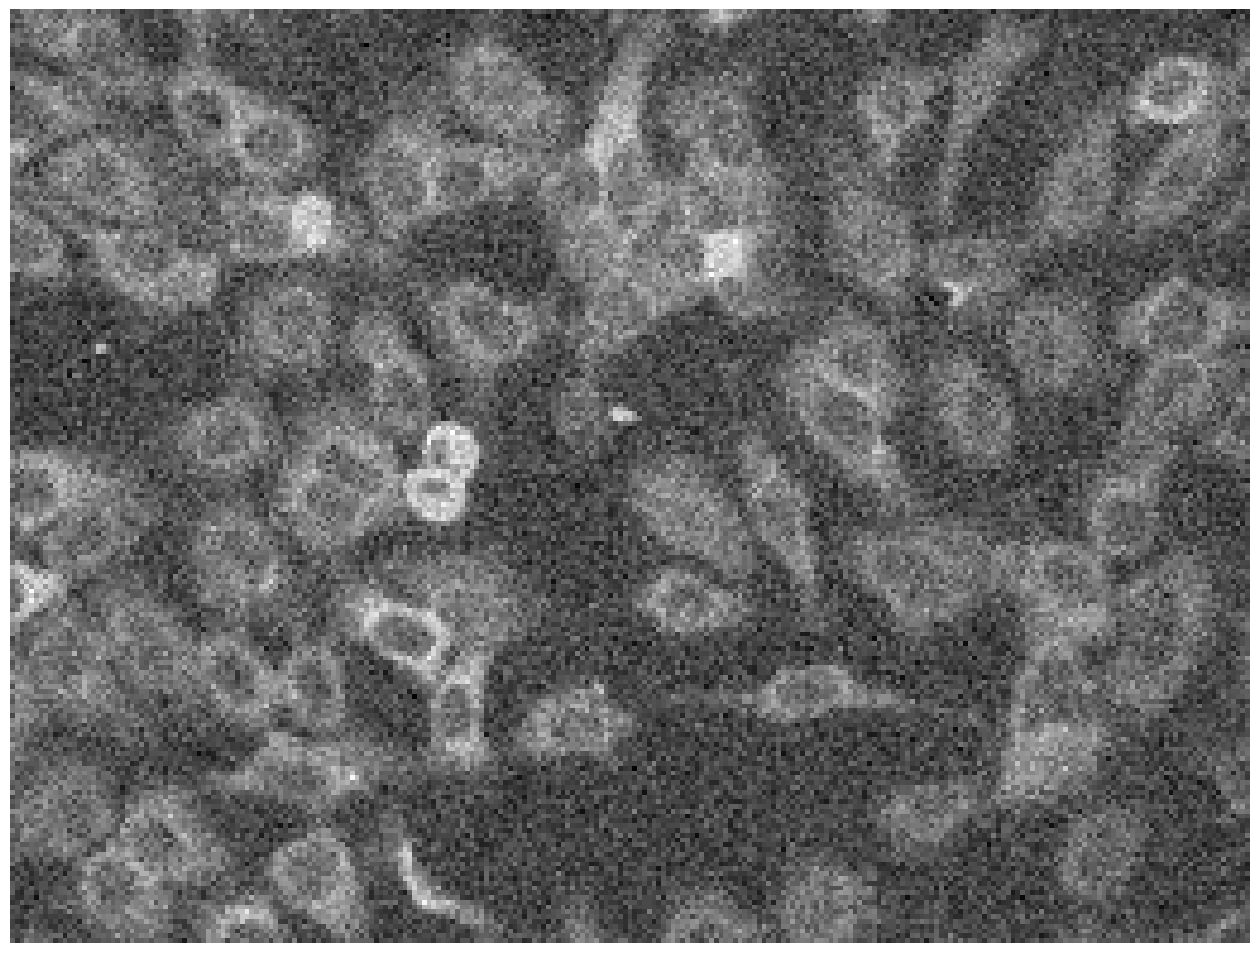

In [124]:
plt.imshow(noisy_image, cmap="gray")
plt.axis('off')
